<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/GeminAgent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title 1. Install & Configure SDK
!pip install -q -U google-genai

import os
import sys
from google import genai
from google.genai import types
from google.colab import userdata

# Retrieve the key from Colab Secrets
try:
    API_KEY = userdata.get("GEMINI_API_KEY")
except Exception as e:
    print("Error: Make sure you have added 'GEMINI_API_KEY' to your Colab Secrets.")
    sys.exit(1)

# Initialize the Client
client = genai.Client(api_key=API_KEY)

# We will use Gemini 2.0 Flash for its speed and agentic capabilities
MODEL_ID = "gemini-2.0-flash-exp"

print("✅ Setup Complete. Client ready.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.6/426.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 13.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.43.0, but you have google-auth 2.45.0 which is incompatible.
✅ Setup Complete. Client ready.


### Example 1:

In [ ]:
# @title Example 1: The Mechanism Explainer
prompt = """
You are a Biology Professor Agent.
Explain the mechanism of CRISPR-Cas9 gene editing.
Focus on:
1. The role of gRNA.
2. The role of the Cas9 enzyme.
3. The outcome of the double-strand break (NHEJ vs HDR).

Keep it concise (under 200 words) and suitable for a biology undergraduate.
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

print(response.text)

Alright class, let's break down CRISPR-Cas9. This system is a revolutionary gene-editing tool derived from bacterial defense mechanisms.

1.  **gRNA's Role:** The guide RNA (gRNA) is a short RNA molecule containing a sequence complementary to the target DNA you want to edit. Think of it as the GPS, directing Cas9 to the precise location in the genome.

2.  **Cas9's Role:** Cas9 is an enzyme that acts like molecular scissors. Guided by the gRNA, it cuts both strands of the DNA at the target site, creating a double-strand break (DSB).

3.  **DSB Repair (NHEJ vs HDR):** Once the DSB is made, the cell tries to repair it. There are two main pathways:

    *   **NHEJ (Non-Homologous End Joining):** This is the cell's quick-and-dirty fix. It's error-prone and often introduces small insertions or deletions (indels), disrupting the gene.

    *   **HDR (Homology-Directed Repair):** If you provide a DNA template with sequences homologous to the cut site, HDR can use it to repair the break, allow

Exercise 1: The Vaccine Mechanism

Task: Copy the code above. Change the prompt to explain the mechanism of mRNA vaccines (like Pfizer/Moderna). Requirements:

    Focus on: Lipid Nanoparticles entry, Translation of Spike Protein, and Immune recognition.

    Keep the same "Biology Professor Agent" persona.

Part 2: The Vision Agent (Multimodal Analysis)

Concept: "Multimodal" means the agent can see. We will use a Vision Agent to identify structures in biological diagrams or microscopy images.

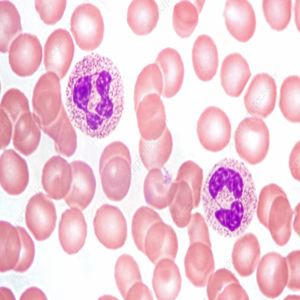


--- Agent Analysis ---

Here's the analysis of the microscopy image:

**1. Central Cell Type:**

The central cells with the prominent, multi-lobed, dark purple nucleus and granular cytoplasm are **Neutrophils**.

**2. Morphology:**

*   **Nucleus:** The nucleus is segmented (multi-lobed), appearing as several connected lobes, each with a slightly different shape. It is stained dark purple.
*   **Cytoplasm:** The cytoplasm is light pink in the background, containing fine, lightly stained granules.

**3. Surrounding Cells:**

The surrounding smaller red cells are **Red Blood Cells (Erythrocytes)**. They appear as circular, biconcave discs, stained pink. They lack a nucleus.


In [ ]:
# @title Example 2: Hematology Analyst
import PIL.Image
import requests
from io import BytesIO

# Load a sample image (Normal Blood Smear)
#url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/PB_neutrophil.jpg/640px-PB_neutrophil.jpg"
url = "https://biologicslab.co/BIO1173/images/class_04/Neutrophils.jpg"
response = requests.get(url)
image = PIL.Image.open(BytesIO(response.content))

# Display the image
display(image.resize((300, 300)))

prompt = """
Analyze this microscopy image.
1. Identify the central cell type.
2. Describe its morphology (nucleus shape, cytoplasm).
3. Identify the surrounding smaller red cells.
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[image, prompt]
)

print("\n--- Agent Analysis ---\n")
print(response.text)

Exercise 2: Plant Cell Analysis

Task: Copy the code above. Change the url to analyze a Plant Cell instead. New Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Plant_cell_wall.svg/640px-Plant_cell_wall.svg.png (or find your own biological diagram). Requirements: Ask the agent to identify the Cell Wall and Chloroplasts.

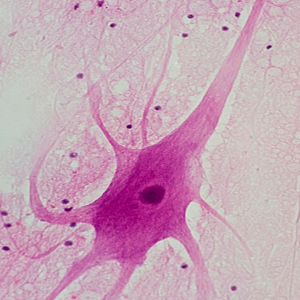


--- Agent Analysis ---

Here are the identified components in the microscopy image:

1.  **Cell Nucleus:** The cell nucleus is the dark, round structure located in the central, thickest part of the large, pink cell. It is deeply stained and appears as a distinct, dark spot.
2.  **Axon:** The axon is the long, slender projection extending from one side of the cell body. It tapers gradually and stretches upwards in the image.
3.  **Dendrites:** The dendrites are the shorter, branch-like extensions radiating from the cell body. There are several dendrites visible, branching out in various directions from the central cell body.


In [ ]:
# @title Exercise 2:
import PIL.Image
import requests
from io import BytesIO

# Load a sample image (Normal Blood Smear)
url = "https://biologicslab.co/BIO1173/images/class_04/Neuron.jpg"
response = requests.get(url)
image = PIL.Image.open(BytesIO(response.content))

# Display the image
display(image.resize((300, 300)))

prompt = """
Analyze this microscopy image.
1. Identify the cell nucleus.
2. Identify the axon.
3. Identify the dendrites
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[image, prompt]
)

print("\n--- Agent Analysis ---\n")
print(response.text)

Example 3: BMI Calculator Tool

We define a Python function for BMI, and the Agent decides when to use it.

In [ ]:
# @title Example 3: The Clinical Calculator
# 1. Define the tool (Python Function)
def calculate_bmi(weight_kg: float, height_m: float) -> float:
    """Calculates Body Mass Index (BMI)."""
    return weight_kg / (height_m ** 2)

# 2. Create the Agent with the tool
# We pass the function to the 'tools' parameter
response = client.models.generate_content(
    model=MODEL_ID,
    contents="My patient is 1.75 meters tall and weighs 70 kg. What is their BMI and is it healthy?",
    config=types.GenerateContentConfig(
        tools=[calculate_bmi] # Give the agent the tool
    )
)

# 3. Print the result
# The agent calls the tool automatically behind the scenes in the SDK
print(response.text)

The patient's BMI is 22.86. A healthy BMI is between 18.5 and 24.9, so the patient's BMI is healthy.



Exercise 3: Kidney Function Tool (Creatinine Clearance)

Task: Copy the code above. Replace the BMI tool with a tool to estimate Creatinine Clearance (Cockcroft-Gault formula). Formula: ((140 - age) * weight_kg) / (72 * serum_creatinine) Prompt: "Calculate the creatinine clearance for a 60-year-old male patient weighing 72kg with a serum creatinine of 1.2 mg/dL."

In [ ]:
# @title Solution: Creatinine Clearance Agent
from google.genai import types

# 1. Define the specific clinical tool (The Cockcroft-Gault Formula)
def calculate_creatinine_clearance(age: int, weight_kg: float, serum_creatinine: float) -> float:
    """
    Calculates Creatinine Clearance (CrCl) using the Cockcroft-Gault formula.
    Formula: ((140 - age) * weight_kg) / (72 * serum_creatinine)
    """
    numerator = (140 - age) * weight_kg
    denominator = 72 * serum_creatinine
    return numerator / denominator

# 2. Create the Agent with the tool
# We pass the function to the 'tools' parameter in the config
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Calculate the creatinine clearance for a 60-year-old male patient weighing 72kg with a serum creatinine of 1.2 mg/dL.",
    config=types.GenerateContentConfig(
        tools=[calculate_creatinine_clearance]
    )
)

# 3. Print the result
print("--- Clinical Agent Response ---")
print(response.text)

--- Clinical Agent Response ---
The creatinine clearance for the patient is 66.67 mL/min.


Example 4: Disease Outbreak Tracker

We will ask the agent to find current information about a disease.

In [ ]:
# @title Example 4: Epidemiology Scout
# We enable 'google_search' as a tool
google_search_tool = types.Tool(
    google_search=types.GoogleSearch()
)

prompt = "What are the latest updates on the spread of H5N1 Bird Flu in mammals in 2024-2025? Cite your sources."

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        tools=[google_search_tool]
    )Video Resource

For a deeper dive into how these agents work, check out this video: Gemini 2.0 Flash: AI Agent in Python

Why this video is relevant: It provides a quick visual demonstration of setting up the Gemini 2.0 Flash model specifically for Agentic tasks (like the ones in this lesson), reinforcing the "Tool Use" concepts you practiced.

Would you like me to prepare a solution key for the "Creatinine Clearance" or "Medication Extraction" exercises?
)

print(response.text)
# Inspect the 'grounding_metadata' to see source links
# print(response.candidates[0].grounding_metadata.search_entry_point.rendered_content)

The spread of H5N1 bird flu in mammals has been a topic of concern in 2024-2025. Here's a summary of the latest updates:

**General Overview**

*   **Global Spread:** H5N1 is widespread in wild birds globally, causing outbreaks in poultry and, notably, in U.S. dairy cows. Sporadic human cases have been reported in the U.S., primarily among dairy and poultry workers.
*   **Low Public Health Risk:** The CDC maintains that the current public health risk remains low, though they are carefully monitoring the situation.
*   **No Human-to-Human Transmission:** As of December 2025, there is no known person-to-person spread of the virus.
*   **Increased Detection in Non-Avian Species:** There's been a rise in H5N1 detections in various wild and domestic mammals worldwide.

**Key Updates & Outbreaks**

*   **Americas Region:** Between April 2022 and November 18, 2025, 19 countries and territories in the Americas reported 5,136 outbreaks of avian influenza A(H5N1). 75 human infections, including 

Exercise 4: Malaria Treatment Search

Task: Copy the code above. Change the prompt to research "Approved Malaria vaccines and their efficacy rates in 2025". Requirements: Ensure the agent searches for the most recent R21/Matrix-M data.

Example 5: Extracting Vitals from Notes

We will force the model to output a clean Python dictionary.

In [ ]:
# @title Example 5: Medical Scribe
from pydantic import BaseModel

# 1. Define the Structure we want
class PatientVitals(BaseModel):
    patient_id: str
    systolic_bp: int
    diastolic_bp: int
    heart_rate: int
    is_critical: bool

# 2. The messy input data
clinical_note = """
Patient John Doe (ID: PT-99283) presented to ER at 14:00.
Observed highly agitated. BP was recorded at 160 over 95, which is concerning.
Pulse is tachycardia at 110 bpm. Respiration 20.
"""

# 3. Run the Agent with 'response_schema'
response = client.models.generate_content(
    model=MODEL_ID,
    contents=f"Extract vitals from this note: {clinical_note}",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=PatientVitals
    )
)

print(response.text)

{
  "patient_id": "PT-99283",
  "systolic_bp": 160,
  "diastolic_bp": 95,
  "heart_rate": 110,
  "is_critical": true
}


Exercise 5: Medication Extraction

Task: Copy the code above.

    Define a new class MedicationOrder with fields: drug_name (str), dosage (str), frequency (str).

    Use this note: "Patient prescribed Amoxicillin 500mg to be taken three times daily for 7 days."

    Extract the data.

In [ ]:
# @title Example 5: Medical Scribe
from pydantic import BaseModel

# 1. Define the Structure we want
class MedicationOrder(BaseModel):
    drug_name: str
    dosage: str
    frequency : str


# 2. The messy input data
clinical_note = """
Patient prescribed Amoxicillin 500mg to be taken three times daily for 7 days.
"""

# 3. Run the Agent with 'response_schema'
response = client.models.generate_content(
    model=MODEL_ID,
    contents=f"Extract vitals from this note: {clinical_note}",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=MedicationOrder
    )
)

print(response.text)

{
"drug_name": "Amoxicillin",
"dosage": "500mg",
"frequency": "three times daily for 7 days"
}


Video Resource

For a deeper dive into how these agents work, check out this video: Gemini 2.0 Flash: AI Agent in Python

Why this video is relevant: It provides a quick visual demonstration of setting up the Gemini 2.0 Flash model specifically for Agentic tasks (like the ones in this lesson), reinforcing the "Tool Use" concepts you practiced.

Would you like me to prepare a solution key for the "Creatinine Clearance" or "Medication Extraction" exercises?